## Q1)

In [8]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import librosa

df = pd.read_csv('audio_labels_20250802_145147.csv')

def extract_features(path):
    y,sr=librosa.load(path,sr=None)
    mfcc=librosa.feature.mfcc(y=y,sr=sr,n_mfcc=13)
    return np.mean(mfcc,axis=1)
df['mfcc']=df['file_path'].apply(extract_features)

X=np.array([mfcc[1:] for mfcc in df['mfcc']])
Y=np.array([mfcc[0] for mfcc in df['mfcc']])

X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

model=LinearRegression().fit(X_train,y_train)
y_test_pred=model.predict(X_test)

print(y_test_pred)



[-407.0888  -365.55063 -438.07397 -375.30746 -405.4291  -424.0674
 -353.1389  -453.7731  -472.26154 -418.1624  -359.70715 -317.565
 -473.63406 -526.11017 -442.00568 -417.16943 -409.4434  -420.8069
 -451.75012 -500.42267 -435.02185 -476.34747 -396.18622]


## Q2)

In [9]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error,mean_absolute_percentage_error

r2score=r2_score(y_test_pred,y_test)
mse=mean_squared_error(y_test_pred,y_test)
rmse=root_mean_squared_error(y_test_pred,y_test)
mape=mean_absolute_percentage_error(y_test_pred,y_test)

print(f"r2score={r2score} \n mse={mse} \n rmse={rmse} \n mape={mape}")

r2score=0.9230303764343262 
 mse=180.94784545898438 
 rmse=13.451685905456543 
 mape=0.026313509792089462


## Q4)

In [11]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0,n_init="auto").fit(X_train)
kmeans.fit(X_train)

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0
 1 0 1 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 0 0 1 1 0 1 1]
[[166.41489    16.629513   13.575672   -3.7673273   5.0727334 -19.82593
   -9.838624   -3.7280362  -7.071101   -8.72676    -1.7567606  -4.3109818]
 [155.04977    32.289143   24.471508  -26.298504    3.347945   -6.63729
  -13.475672  -10.79335    -1.3783023  -8.734295   -2.1626492  -8.789482 ]]


## Q5)

In [12]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score

kmeans = KMeans(n_clusters=2, random_state=42).fit(X_train)
silhouette_score(X_train, kmeans.labels_)
calinski_harabasz_score(X_train, kmeans.labels_)
davies_bouldin_score(X_train, kmeans.labels_)

1.468169858146836

## Q6)

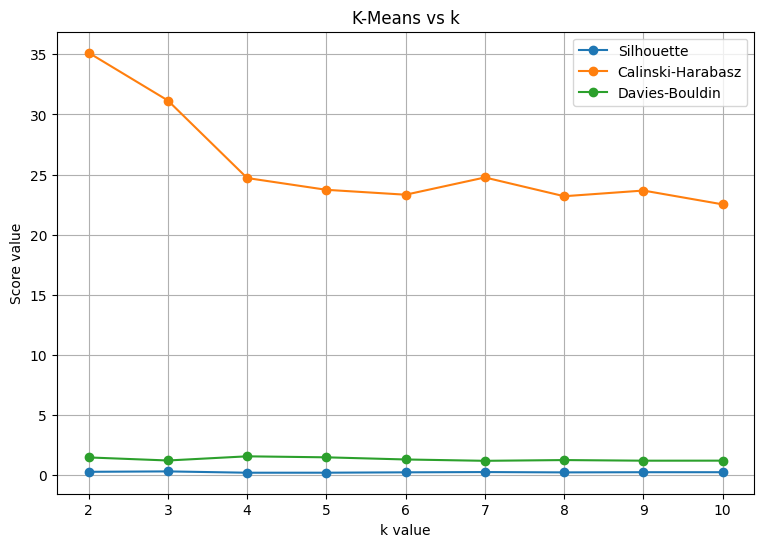

In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,calinski_harabasz_score,davies_bouldin_score
import matplotlib.pyplot as plt

k_values=range(2,11)
sil_scores=[]
calinski_scores=[]
davies_scores=[]

for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42,n_init="auto")
    kmeans.fit(X_train)
    labels=kmeans.labels_

    sil_scores.append(silhouette_score(X_train,labels))
    calinski_scores.append(calinski_harabasz_score(X_train,labels))
    davies_scores.append(davies_bouldin_score(X_train,labels))

plt.figure(figsize=(9,6))
plt.plot(k_values,sil_scores,'-o',label='Silhouette')
plt.plot(k_values,calinski_scores,'-o',label='Calinski-Harabasz')
plt.plot(k_values,davies_scores,'-o',label='Davies-Bouldin')
plt.xlabel('k value')
plt.ylabel('Score value')
plt.title('K-Means vs k')
plt.legend()
plt.grid(True)
plt.show()

## Q7)

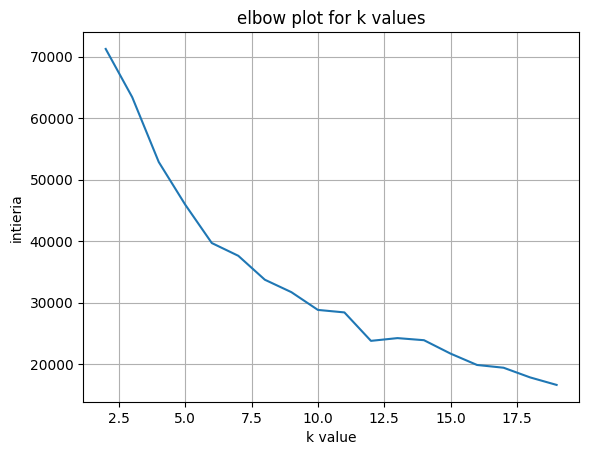

In [16]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions=[]
for k in range(2,20):
    kmeans=KMeans(n_clusters=k).fit(X_train)
    distortions.append(kmeans.inertia_)

plt.plot(range(2,20),distortions)
plt.xlabel('k value')
plt.ylabel('intieria')
plt.title('elbow plot for k values')
plt.grid(True)
plt.show()
